## Main Text Figures for the manuscript "Cultural Individualism/Collectivism Moderates the Effects of Climate Action Interventions"

### Install Libraries

In [34]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import bff
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 30 seconds


### Import data and run data preprocessing

In [35]:
#import main df
df = pd.read_excel("data63.xlsx")

#load predictor dataframe
predictordata = pd.read_excel("PredictorData.xlsx")

#merge main dataframe with predictor data & wvs survey data
df = df.merge(predictordata, on='Country', how='left')

In [36]:
df = df.rename(columns={"IndividualismHI": "Ind_score"})
#create variable split around 50
df['Ind_ms'] = df['Ind_score'].apply(lambda x: 1 if x < 50 else 2)

#global median split
df_col = df.loc[df['Ind_ms']==1] #dataframe for collectivist countries
df_ind = df.loc[df['Ind_ms']==2] #dataframe for individualist countries
df = df.dropna(subset=['Ind_ms'])
#59440 participants

In [37]:
#create clean dfs for each variable
cols_to_check = ["BELIEFcc"]
df_belief1 = df.dropna(subset=cols_to_check)

cols_to_check = ["POLICYcc"]
df_policy1 = df.dropna(subset=cols_to_check)

cols_to_check = ["SHAREcc"]
df_share1 = df.dropna(subset=cols_to_check)

cols_to_check = ["WEPTcc"]
df_WEPT1 = df.dropna(subset=cols_to_check)

In [38]:
#create control condition dataframe (for figure 1)
dfc = df[df['condName'] == "Control"]
#5085 rows

## Fig 1

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/986582085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['SHAREcc'] = dfc['SHAREcc'] * 100


<IPython.core.display.Javascript object>


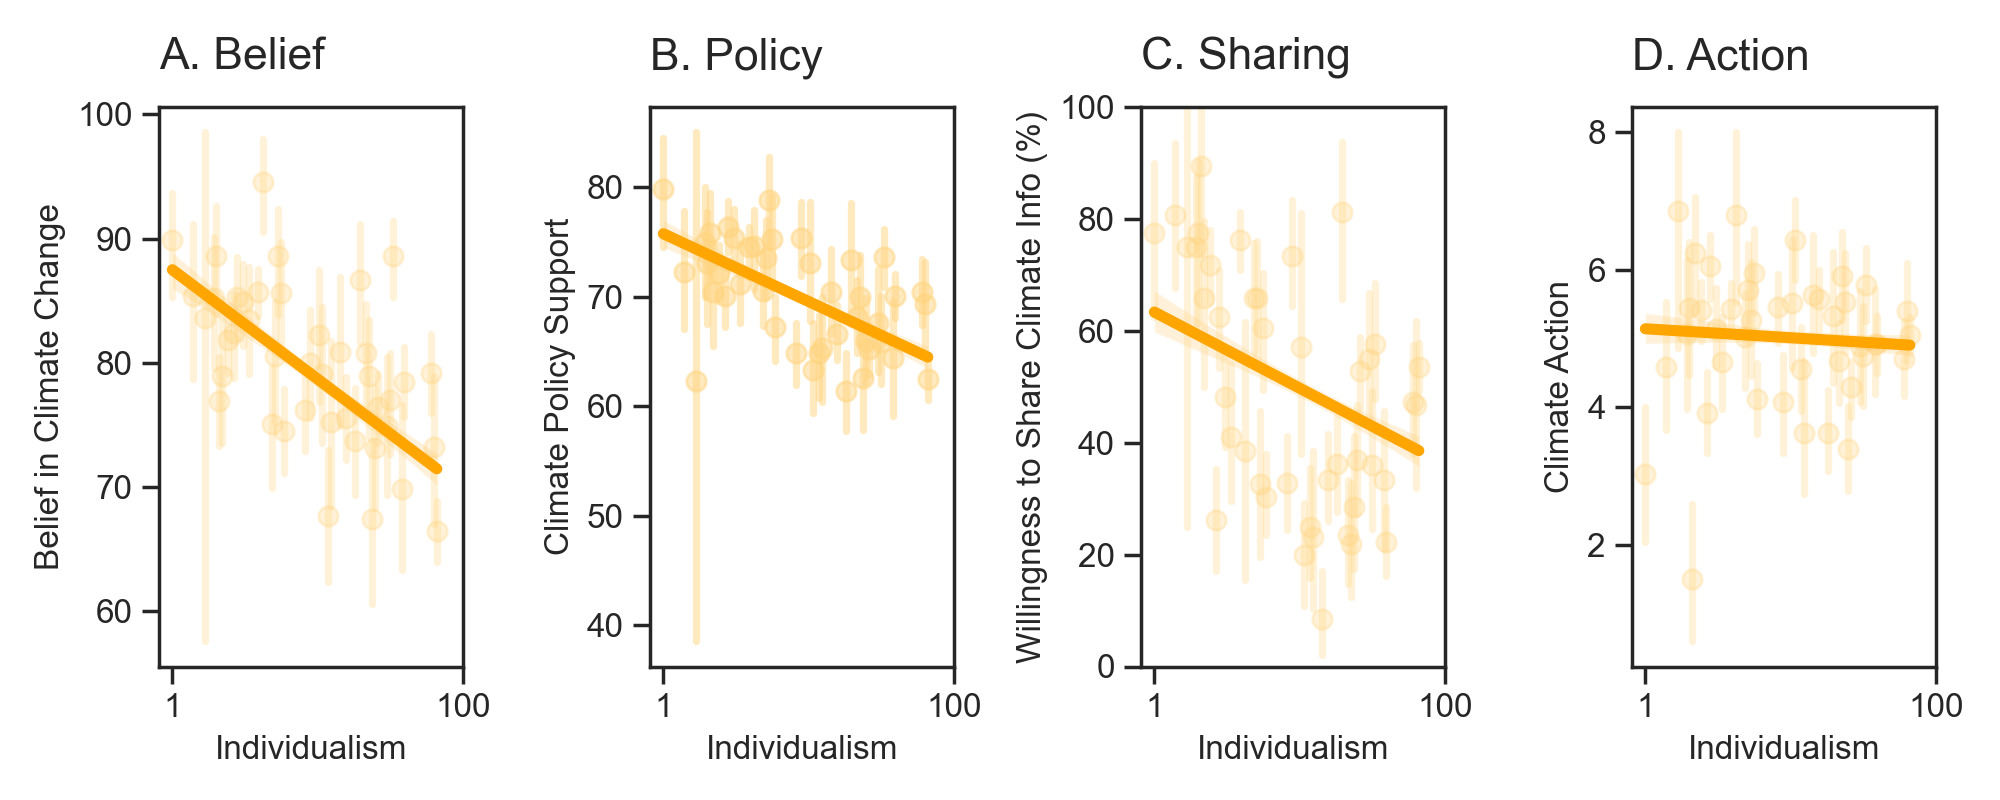

In [39]:
# Convert SHAREcc to percentages
dfc['SHAREcc'] = dfc['SHAREcc'] * 100

fig, ax = plt.subplots(1,4, figsize=(10,4))

sns.regplot(y=dfc.BELIEFcc, x=dfc.Ind_score, scatter_kws={"color": "#FFD580","alpha":.3}, \
            line_kws={"color":"orange","alpha":1,"lw":4},x_estimator=np.mean, ax=ax[0])
sns.regplot(y=dfc.POLICYcc, x=dfc.Ind_score, scatter_kws={"color": "#FFD580","alpha":.5}, \
            line_kws={"color":"orange", "linewidth": 4}, x_estimator=np.mean, ax=ax[1])
sns.regplot(y=dfc.SHAREcc, x=dfc.Ind_score, scatter_kws={"color": "#FFD580","alpha":.3}, \
            line_kws={"color":"orange","alpha":1,"lw":4} ,x_estimator=np.mean, ax=ax[2])
sns.regplot(y=dfc.WEPTcc, x=dfc.Ind_score, scatter_kws={"color": "#FFD580","alpha":.3}, \
            line_kws={"color":"orange","alpha":1,"lw":4} ,x_estimator=np.mean, ax=ax[3])

ax[0].set_ylabel('Belief in Climate Change')
ax[0].set_xticks([1, 100])
ax[0].set_xlabel('Individualism')

ax[1].set_xlabel('Individualism')
ax[1].set_ylabel('Climate Policy Support')
ax[1].set_xticks([1, 100])

ax[2].set_xticks([1, 100])
ax[2].set_ylabel('Willingness to Share Climate Info (%)')
ax[2].set_xlabel('Individualism')

ax[2].set_ylim([0, 100])
ax[2].set_yticks(np.arange(0, 101, 20))

ax[3].set_xticks([1, 100])
ax[3].set_ylabel('Climate Action')
ax[3].set_xlabel('Individualism')

bff.panellabel(ax[0], "A. Belief")
bff.panellabel(ax[1], "B. Policy")
bff.panellabel(ax[2], "C. Sharing")
bff.panellabel(ax[3], "D. Action")
plt.tight_layout()
plt.show()
plt.savefig('Fig1.jpeg', dpi=500, format="jpeg")

## Fig 2. CLIMATE BELIEF

<IPython.core.display.Javascript object>


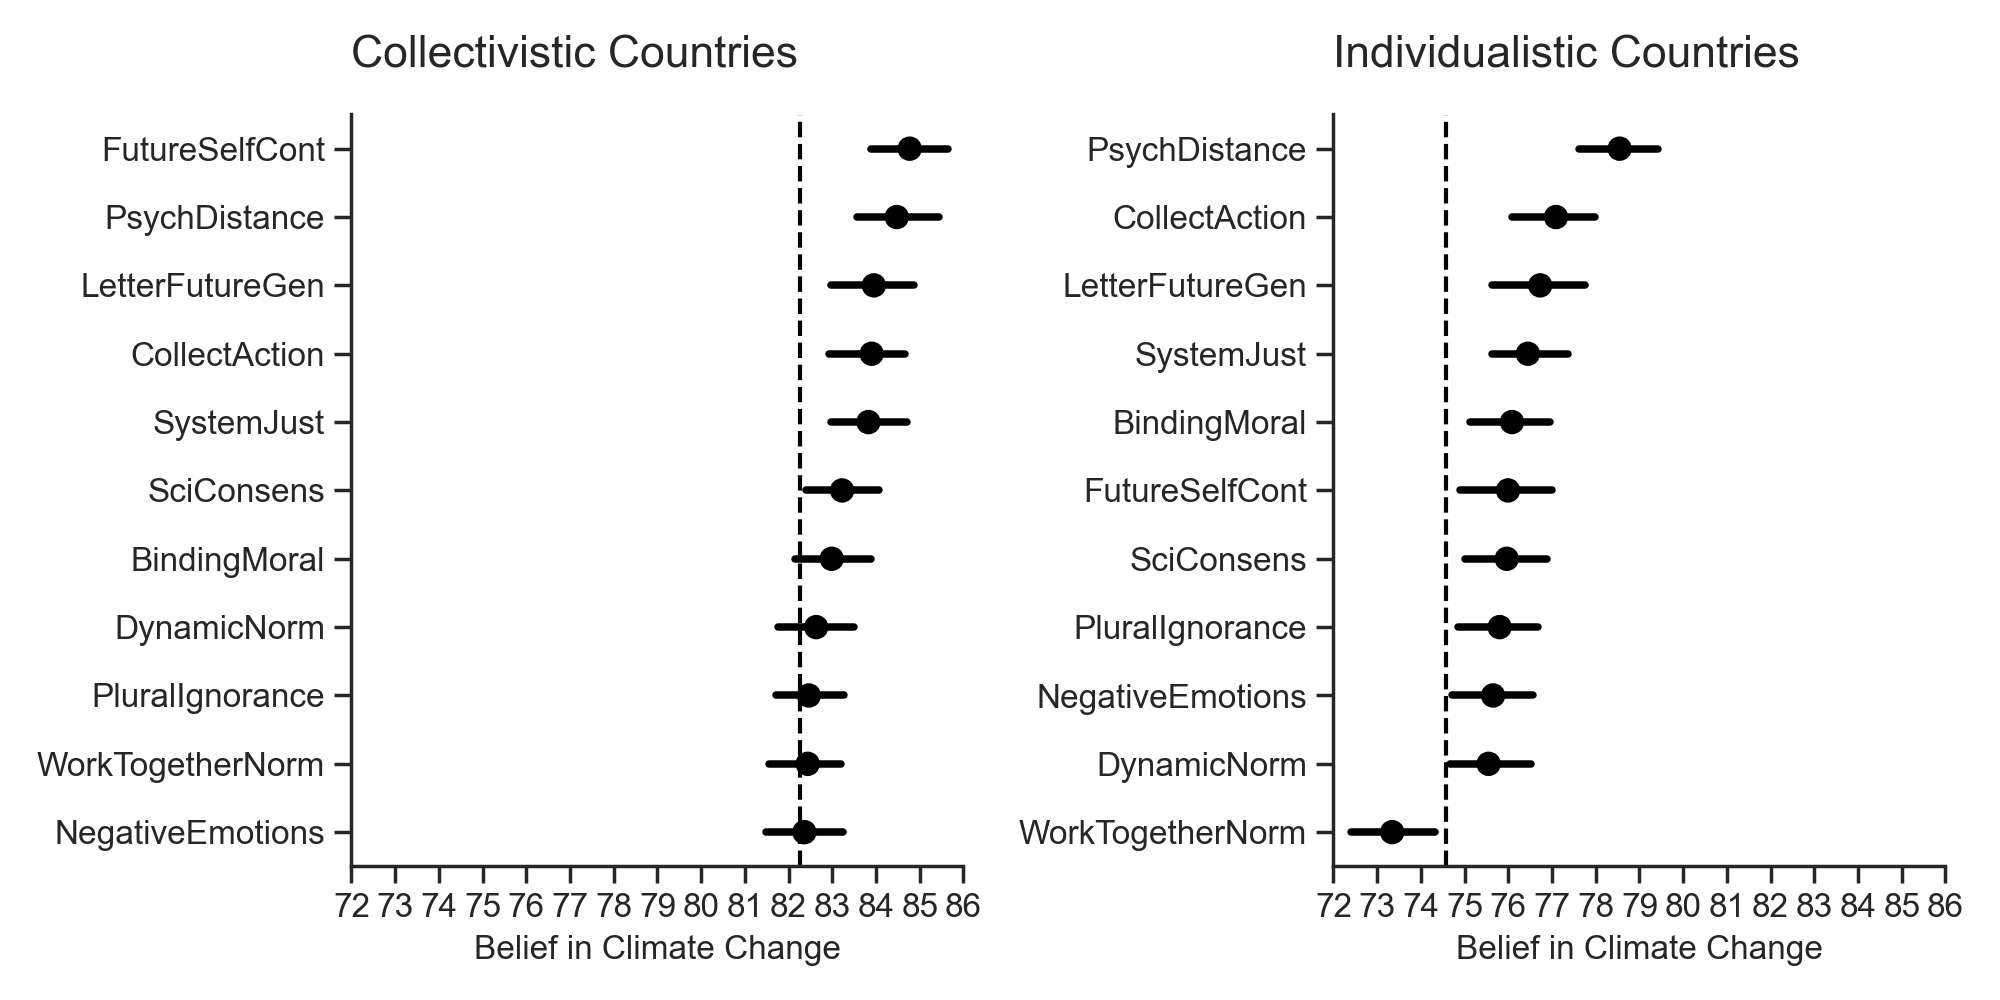

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/2243845009.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_ind = df_ind.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index.drop('Control')
/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/2243845009.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_col = df_col.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index.drop('Control')


In [40]:
#create clean dfs
df_col_belief1 = df_belief1.loc[(df_belief1['Ind_ms']==1) & (df_belief1['condName']!="Control")] #dataframe for collectivist countries, excluding Control
df_ind_belief1 = df_belief1.loc[(df_belief1['Ind_ms']==2) & (df_belief1['condName']!="Control")] #dataframe for individualist countries, excluding Control

fig, ax = plt.subplots(1,2, figsize=(10,5))

order_ind = df_ind.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index.drop('Control')
order_col = df_col.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index.drop('Control')

# Notice that the "df_col_belief1" is now assigned to ax[0] and "df_ind_belief1" to ax[1]
sns.pointplot(y=df_col_belief1.condName, x=df_col_belief1.BELIEFcc, data=df_col_belief1, orient="h", 
            palette=["black"], join=False,  
            order=order_col, ax=ax[0])

sns.pointplot(y=df_ind_belief1.condName, x=df_ind_belief1.BELIEFcc, data=df_ind_belief1, orient="h", 
            palette=["black"], join=False, 
            order=order_ind, ax=ax[1])

sns.despine()

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[0].set_xlabel("Belief in Climate Change")
ax[1].set_xlabel("Belief in Climate Change")

# Again, labels are switched to match the new plot positions
bff.panellabel(ax[0], "Collectivistic Countries")
bff.panellabel(ax[1], "Individualistic Countries")

# Calculate the mean for the Control condition
control_mean_ind = df_belief1.loc[(df_belief1['Ind_ms']==2) & (df_belief1['condName']=="Control"), "BELIEFcc"].mean()
control_mean_col = df_belief1.loc[(df_belief1['Ind_ms']==1) & (df_belief1['condName']=="Control"), "BELIEFcc"].mean()

# Add vertical lines that represent the mean for the "Control" condition
ax[0].axvline(control_mean_col, c="black", ls="--")  # dotted line for collectivistic countries
ax[1].axvline(control_mean_ind, c="black", ls="--")  # dotted line for individualistic countries

# Manually setting tick marks
ax[0].set_xticks(range(72, 87)) 
ax[1].set_xticks(range(72, 87)) 

plt.tight_layout()
plt.savefig('figure_Belief.jpeg', dpi=900, format="jpg")

## Fig 3. POLICY SUPPORT

<IPython.core.display.Javascript object>


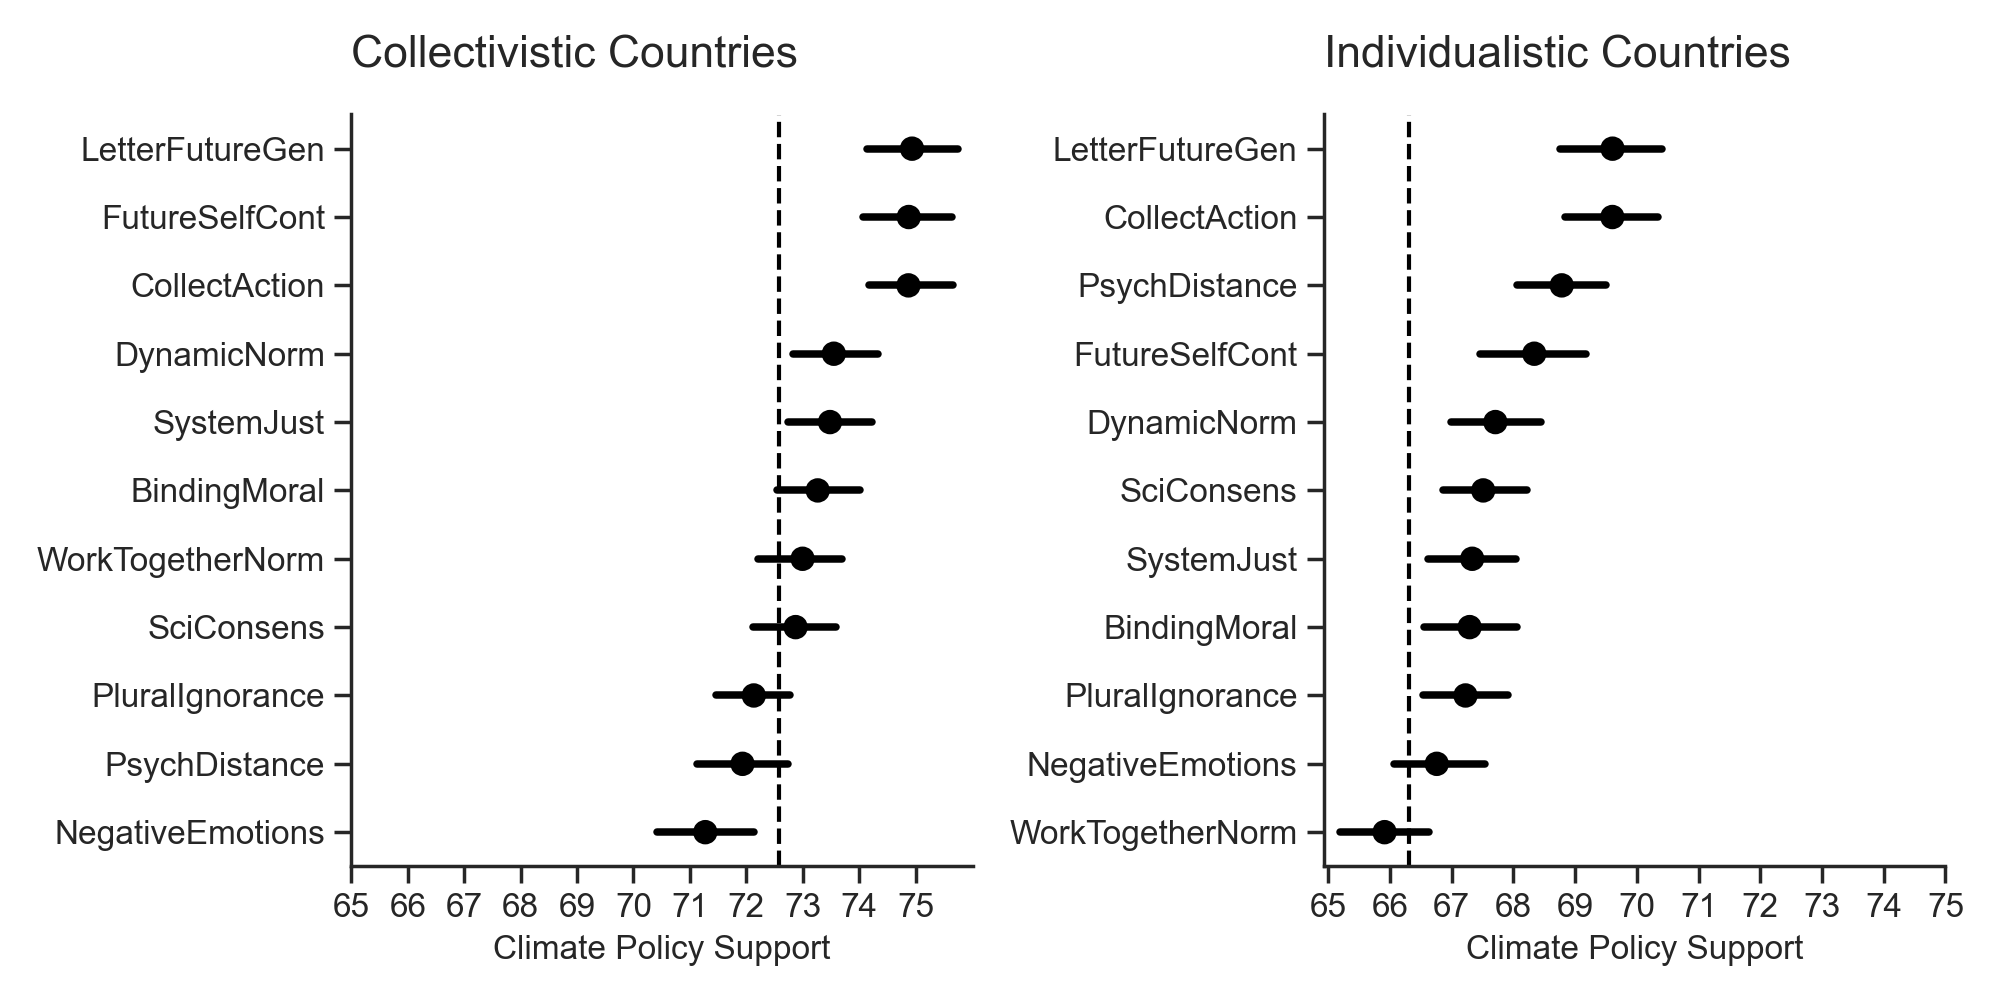

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/3359093601.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_ind = df_ind.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index.drop('Control')
/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/3359093601.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_col = df_col.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index.drop('Control')


In [41]:
#create clean dfs
df_col_policy1 = df_policy1.loc[(df_policy1['Ind_ms']==1) & (df_policy1['condName']!="Control")] #dataframe for collectivist countries, excluding Control
df_ind_policy1 = df_policy1.loc[(df_policy1['Ind_ms']==2) & (df_policy1['condName']!="Control")] #dataframe for individualist countries, excluding Control

fig, ax = plt.subplots(1,2, figsize=(10,5))

order_ind = df_ind.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index.drop('Control')
order_col = df_col.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index.drop('Control')

sns.pointplot(y=df_col_policy1.condName, x=df_col_policy1.POLICYcc, data=df_col_policy1, orient="h", 
            palette=["black"], join=False,  
            order=order_col, ax=ax[0])

sns.pointplot(y=df_ind_policy1.condName, x=df_ind_policy1.POLICYcc, data=df_ind_policy1, orient="h", 
            palette=["black"], join=False, 
            order=order_ind, ax=ax[1])

sns.despine()

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[0].set_xlabel("Climate Policy Support")
ax[1].set_xlabel("Climate Policy Support")

bff.panellabel(ax[0], "Collectivistic Countries")
bff.panellabel(ax[1], "Individualistic Countries")

# Calculate the mean for the Control condition
control_mean_ind = df_policy1.loc[(df_policy1['Ind_ms']==2) & (df_policy1['condName']=="Control"), "POLICYcc"].mean()
control_mean_col = df_policy1.loc[(df_policy1['Ind_ms']==1) & (df_policy1['condName']=="Control"), "POLICYcc"].mean()

# Add vertical lines that represent the mean for the "Control" condition
ax[0].axvline(control_mean_col, c="black", ls="--")  # dotted line for collectivistic countries
ax[1].axvline(control_mean_ind, c="black", ls="--")  # dotted line for individualistic countries

# Manually setting tick marks
ax[0].set_xticks(range(65, 76)) 
ax[1].set_xticks(range(65, 76)) 

plt.tight_layout()
plt.savefig('figure_Policy.jpeg', dpi=900, format="jpg")

## Fig 4. SOCIAL MEDIA SHARING

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/1765216765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_share1['SHAREcc'] = df_col_share1['SHAREcc'] * 100
/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/1765216765.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind_share1['SHAREcc'] = df_ind_share1['SHAREcc'] * 100


<IPython.core.display.Javascript object>


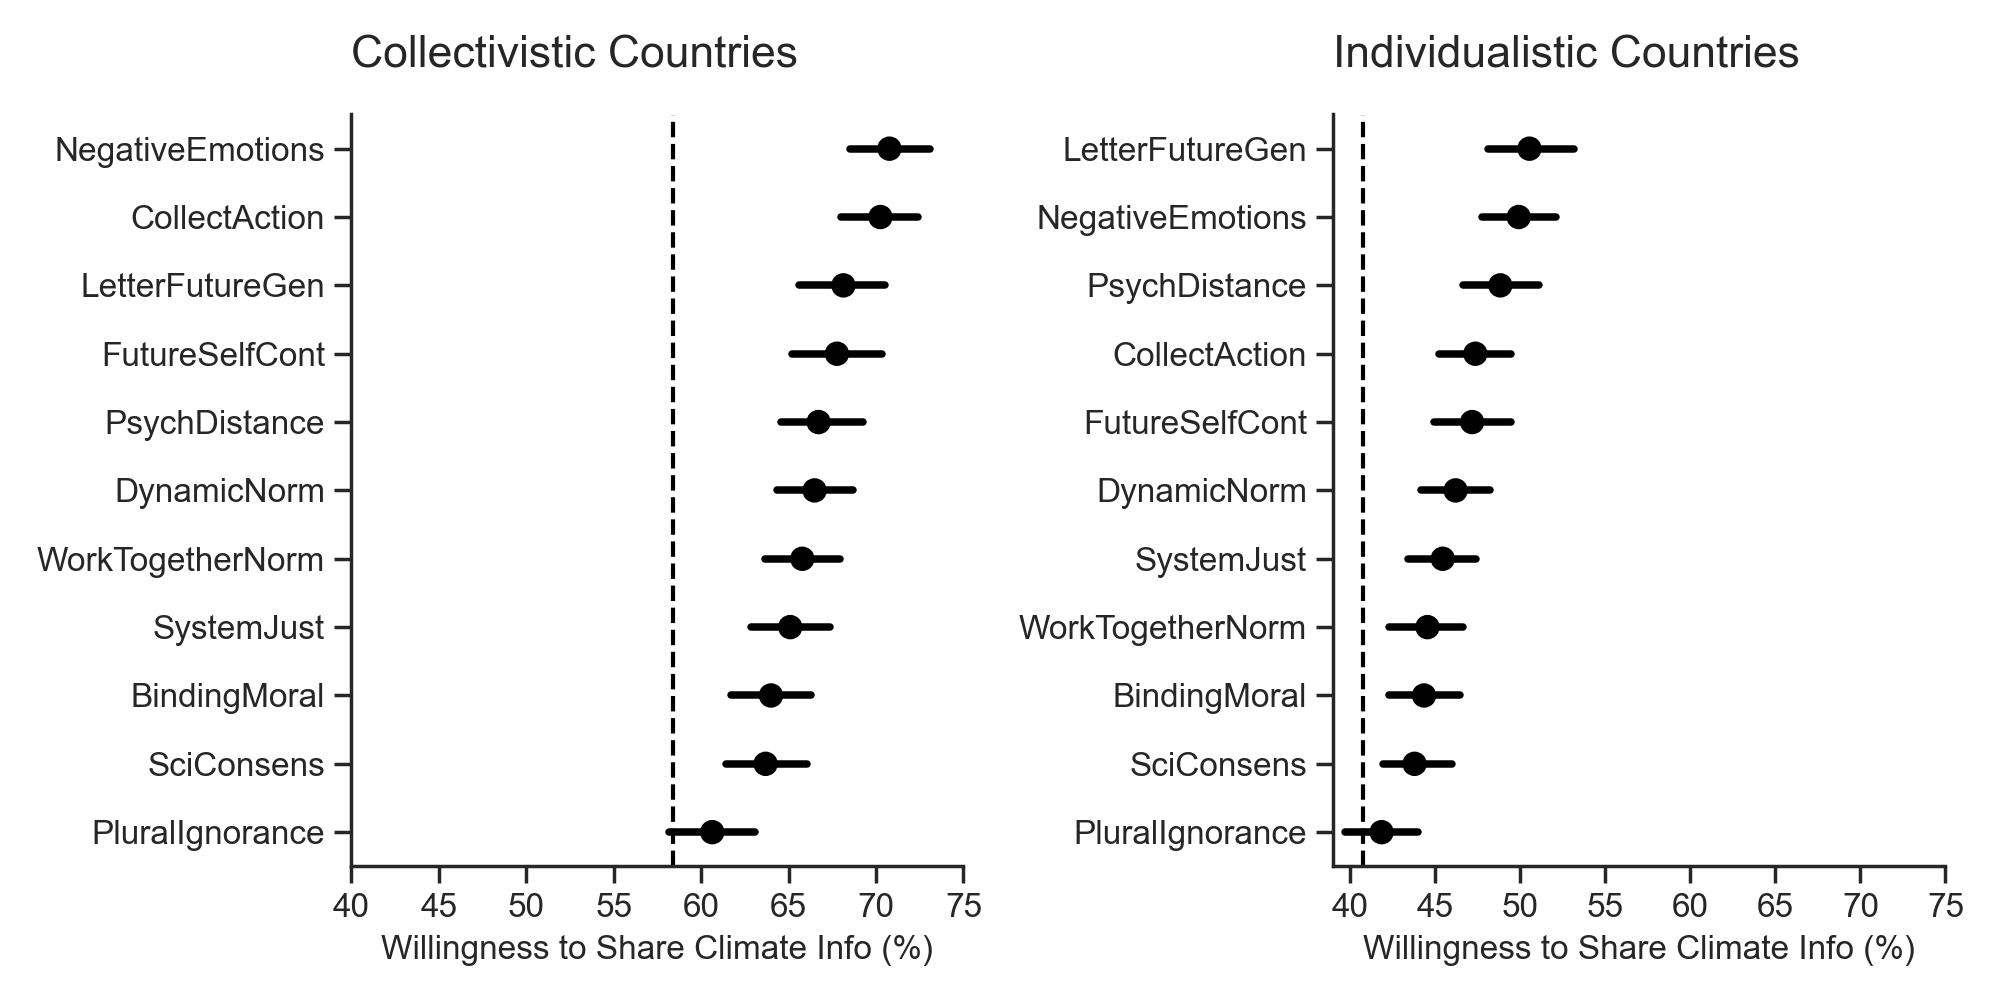

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/1765216765.py:11: FutureWarning: ['ResponseId', 'Country', 'Intervention_order', 'Indirect_SES'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  order_ind = df_ind.groupby("condName").agg(lambda x: x.mean()*100)["SHAREcc"].sort_values(ascending=False).index.drop('Control')
/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/1765216765.py:12: FutureWarning: ['ResponseId', 'Country', 'Intervention_order', 'Indirect_SES', 'Notes'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  order_col = df_col.groupby("condName").agg(lambda x: x.mean()*100)["SHAREcc"].sort_values(ascending=False).index.drop('Control')


In [42]:
#create clean dfs
df_col_share1 = df_share1.loc[(df_share1['Ind_ms']==1) & (df_share1['condName']!="Control")] #dataframe for collectivist countries, excluding Control
df_ind_share1 = df_share1.loc[(df_share1['Ind_ms']==2) & (df_share1['condName']!="Control")] #dataframe for individualist countries, excluding Control

# Convert SHAREcc to percentages
df_col_share1['SHAREcc'] = df_col_share1['SHAREcc'] * 100
df_ind_share1['SHAREcc'] = df_ind_share1['SHAREcc'] * 100

fig, ax = plt.subplots(1,2, figsize=(10,5))

order_ind = df_ind.groupby("condName").agg(lambda x: x.mean()*100)["SHAREcc"].sort_values(ascending=False).index.drop('Control')
order_col = df_col.groupby("condName").agg(lambda x: x.mean()*100)["SHAREcc"].sort_values(ascending=False).index.drop('Control')

sns.pointplot(y=df_col_share1.condName, x=df_col_share1.SHAREcc, data=df_col_share1, orient="h", 
            palette=["black"], join=False,  
            order=order_col, ax=ax[0])

sns.pointplot(y=df_ind_share1.condName, x=df_ind_share1.SHAREcc, data=df_ind_share1, orient="h", 
            palette=["black"], join=False, 
            order=order_ind, ax=ax[1])

sns.despine()

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[0].set_xlabel("Willingness to Share Climate Info (%)")
ax[1].set_xlabel("Willingness to Share Climate Info (%)")

bff.panellabel(ax[0], "Collectivistic Countries")
bff.panellabel(ax[1], "Individualistic Countries")

# Calculate the mean for the Control condition in percentages
control_mean_ind = df_share1.loc[(df_share1['Ind_ms']==2) & (df_share1['condName']=="Control"), "SHAREcc"].mean() * 100
control_mean_col = df_share1.loc[(df_share1['Ind_ms']==1) & (df_share1['condName']=="Control"), "SHAREcc"].mean() * 100

# Add vertical lines that represent the mean for the "Control" condition
ax[0].axvline(control_mean_col, c="black", ls="--")  # dotted line for collectivistic countries
ax[1].axvline(control_mean_ind, c="black", ls="--")  # dotted line for individualistic countries

# Setting x tick marks for both axes for percentages
ticks = np.arange(40, 76, 5)  
ax[0].set_xticks(ticks)
ax[1].set_xticks(ticks)

plt.tight_layout()
plt.savefig('figure_Share.jpeg', dpi=900, format="jpg")

## Fig 5. WEPT

<IPython.core.display.Javascript object>


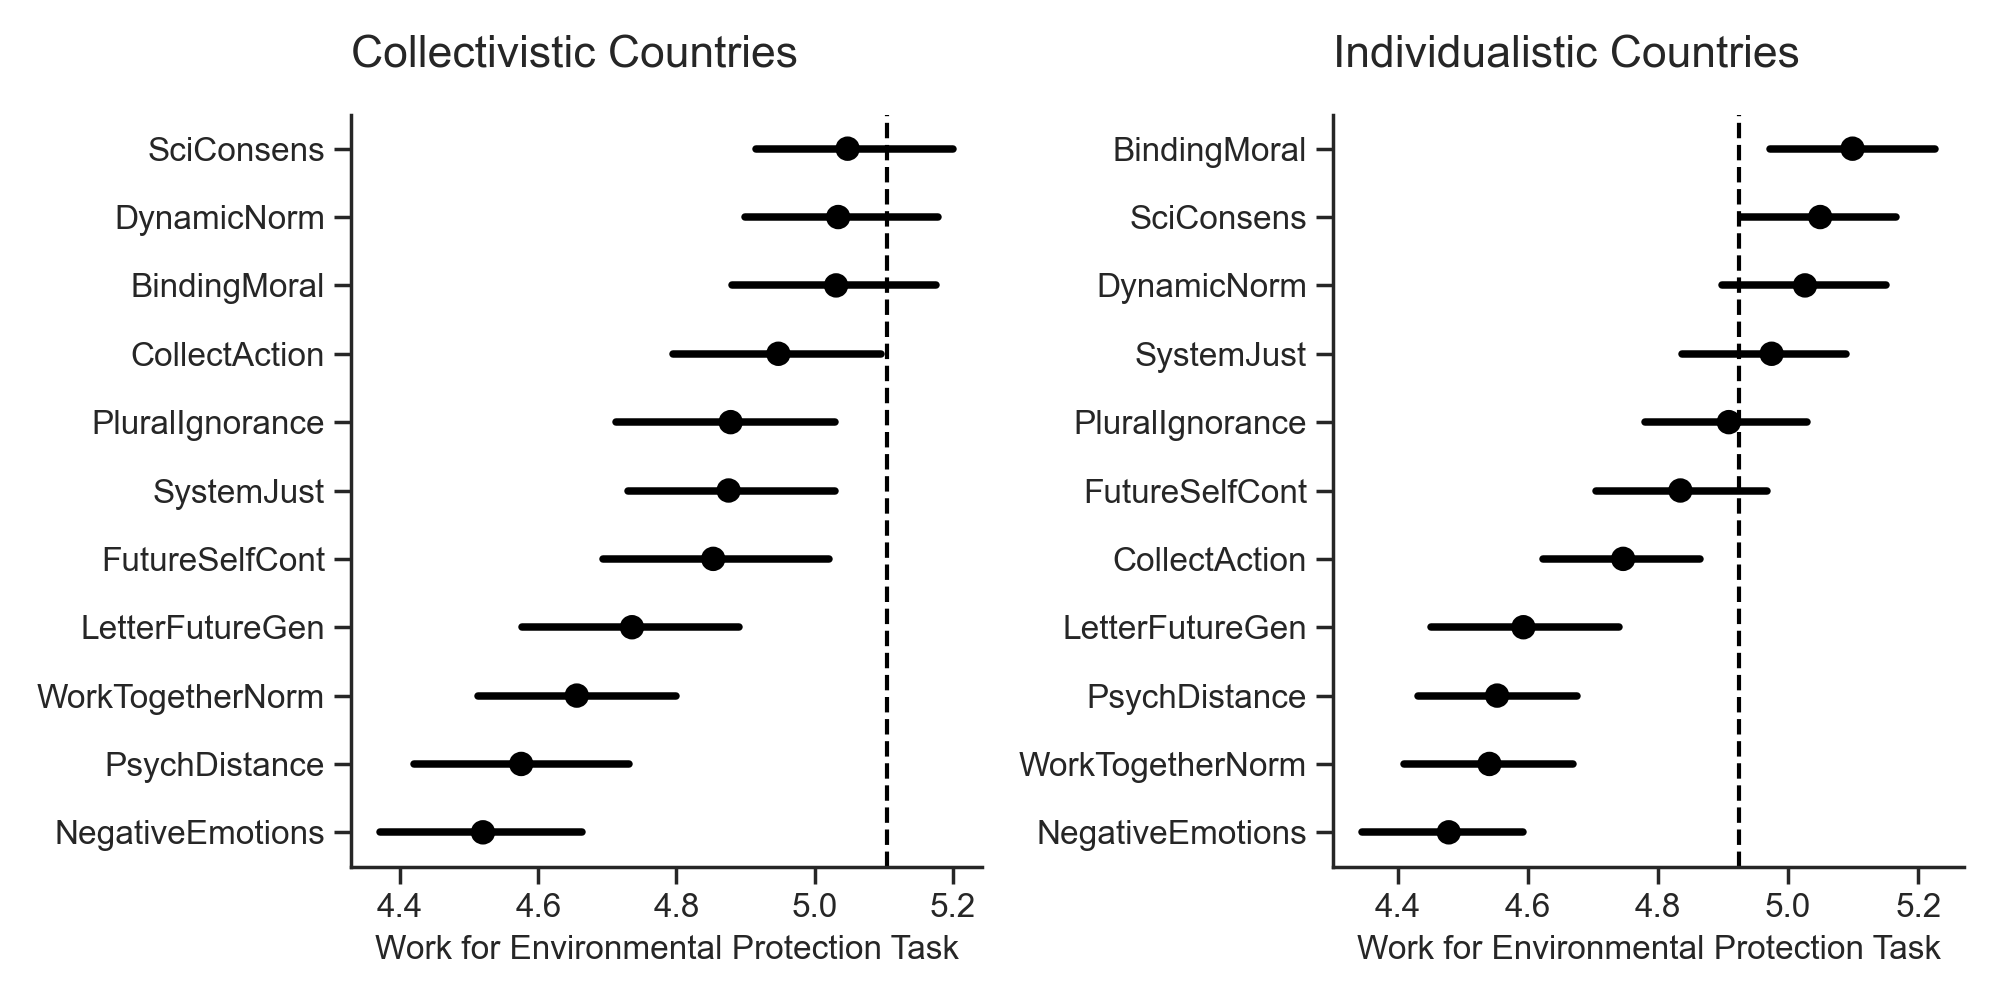

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/436544929.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_ind = df_ind.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index.drop('Control')
/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_34911/436544929.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_col = df_col.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index.drop('Control')


In [43]:
#create clean dfs
df_col_WEPT1 = df_WEPT1.loc[(df_WEPT1['Ind_ms']==1) & (df_WEPT1['condName']!="Control")] #dataframe for collectivist countries, excluding Control
df_ind_WEPT1 = df_WEPT1.loc[(df_WEPT1['Ind_ms']==2) & (df_WEPT1['condName']!="Control")] #dataframe for individualist countries, excluding Control

fig, ax = plt.subplots(1,2, figsize=(10,5))

order_ind = df_ind.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index.drop('Control')
order_col = df_col.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index.drop('Control')

# Notice that the "df_col_WEPT1" is now assigned to ax[0] and "df_ind_WEPT1" to ax[1]
sns.pointplot(y=df_col_WEPT1.condName, x=df_col_WEPT1.WEPTcc, data=df_col_WEPT1, orient="h", 
            palette=["black"], join=False,  
            order=order_col, ax=ax[0])

sns.pointplot(y=df_ind_WEPT1.condName, x=df_ind_WEPT1.WEPTcc, data=df_ind_WEPT1, orient="h", 
            palette=["black"], join=False, 
            order=order_ind, ax=ax[1])

sns.despine()

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[0].set_xlabel("Work for Environmental Protection Task")
ax[1].set_xlabel("Work for Environmental Protection Task")

bff.panellabel(ax[0], "Collectivistic Countries")
bff.panellabel(ax[1], "Individualistic Countries")

# Calculate the mean for the Control condition
control_mean_ind = df_WEPT1.loc[(df_WEPT1['Ind_ms']==2) & (df_WEPT1['condName']=="Control"), "WEPTcc"].mean()
control_mean_col = df_WEPT1.loc[(df_WEPT1['Ind_ms']==1) & (df_WEPT1['condName']=="Control"), "WEPTcc"].mean()

# Add vertical lines that represent the mean for the "Control" condition
ax[0].axvline(control_mean_col, c="black", ls="--")  # dotted line for collectivistic countries
ax[1].axvline(control_mean_ind, c="black", ls="--")  # dotted line for individualistic countries

# Manually setting tick marks
#ax[0].set_xticks(range(72, 87)) 
#ax[1].set_xticks(range(72, 87)) 

plt.tight_layout()
plt.savefig('figure_WEPT.jpeg', dpi=900, format="jpg")